  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
label      0
message    0
dtype: int64
Accuracy: 0.9650224215246637

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.74      0.85       149

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.97      0.96      1115



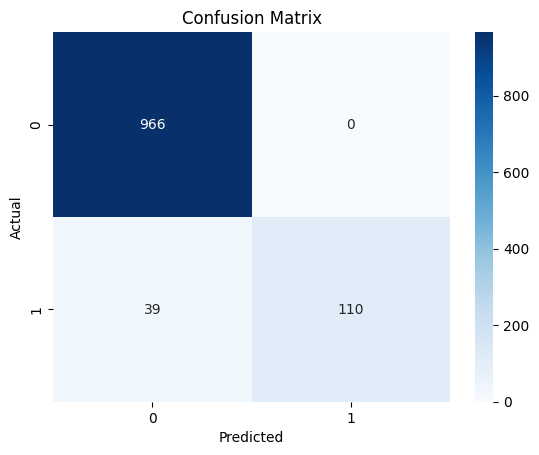

['vectorizer.pkl']

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import re

# Step 1: Load the dataset
df = pd.read_csv('/content/mail_data.csv')

# Display the first few rows
print(df.head())

# Step 2: Data Preprocessing
# Rename columns for easier access
df.columns = ['label', 'message']

# Convert labels to binary (spam=1, ham=0)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Check for missing values
print(df.isnull().sum())

# Clean the messages (remove special characters and numbers)
def clean_message(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text.strip().lower()

df['cleaned_message'] = df['message'].apply(clean_message)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_message'], df['label'], test_size=0.2, random_state=42)

# Step 4: Feature Extraction using TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 5: Train the Naive Bayes Model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test_vec)

# Step 7: Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 8: Save the Model and Vectorizer
joblib.dump(model, 'spam_classifier_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

In [2]:
# Load the model and vectorizer
loaded_model = joblib.load('spam_classifier_model.pkl')
loaded_vectorizer = joblib.load('vectorizer.pkl')

# Test with new messages
new_messages = [
    "Congratulations! You've won a free gift card. Click here to claim now.",
    "Hi, can we meet tomorrow for the project discussion?",
]

# Clean the new messages
new_messages_cleaned = [clean_message(msg) for msg in new_messages]

# Transform and predict
new_messages_vec = loaded_vectorizer.transform(new_messages_cleaned)
predictions = loaded_model.predict(new_messages_vec)

# Display predictions
for msg, label in zip(new_messages, predictions):
    print(f"\nMessage: {msg}\nPrediction: {'Spam' if label == 1 else 'Ham'}")


Message: Congratulations! You've won a free gift card. Click here to claim now.
Prediction: Spam

Message: Hi, can we meet tomorrow for the project discussion?
Prediction: Ham
